In [21]:
pip install --upgrade nbformat nbconvert notebook ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 6.5 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.10
    Uninstalling widgetsnbextension-3.6.10:
      Successfully uninstalled widgetsnbextension-3.6.10
  Attempt

In [1]:
pip install pm4py

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import pm4py

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


In [3]:
#Adding data in
event_log = pm4py.read_xes('Hospital Billing - Event Log.xes')
start_activities = pm4py.get_start_activities(event_log)
end_activities = pm4py.get_end_activities(event_log)
print("Start activities: {}\nEnd activities: {}".format(start_activities,end_activities))

parsing log, completed traces ::   0%|          | 0/100000 [00:00<?, ?it/s]

Start activities: {'NEW': 100000}
End activities: {'BILLED': 63498, 'DELETE': 8215, 'NEW': 22407, 'FIN': 3611, 'SET STATUS': 600, 'CODE OK': 948, 'MANUAL': 85, 'JOIN-PAT': 47, 'CHANGE DIAGN': 19, 'RELEASE': 107, 'CODE NOK': 14, 'EMPTY': 444, 'REJECT': 4, 'STORNO': 1}


In [4]:
event_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451359 entries, 0 to 451358
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   isCancelled           108222 non-null  object        
 1   diagnosis             81885 non-null   object        
 2   time:timestamp        451359 non-null  datetime64[ns]
 3   caseType              101626 non-null  object        
 4   speciality            100000 non-null  object        
 5   org:resource          249081 non-null  object        
 6   concept:name          451359 non-null  object        
 7   blocked               100000 non-null  object        
 8   isClosed              100390 non-null  object        
 9   flagD                 100038 non-null  object        
 10  flagB                 100000 non-null  object        
 11  flagA                 100000 non-null  object        
 12  state                 379658 non-null  object        
 13 

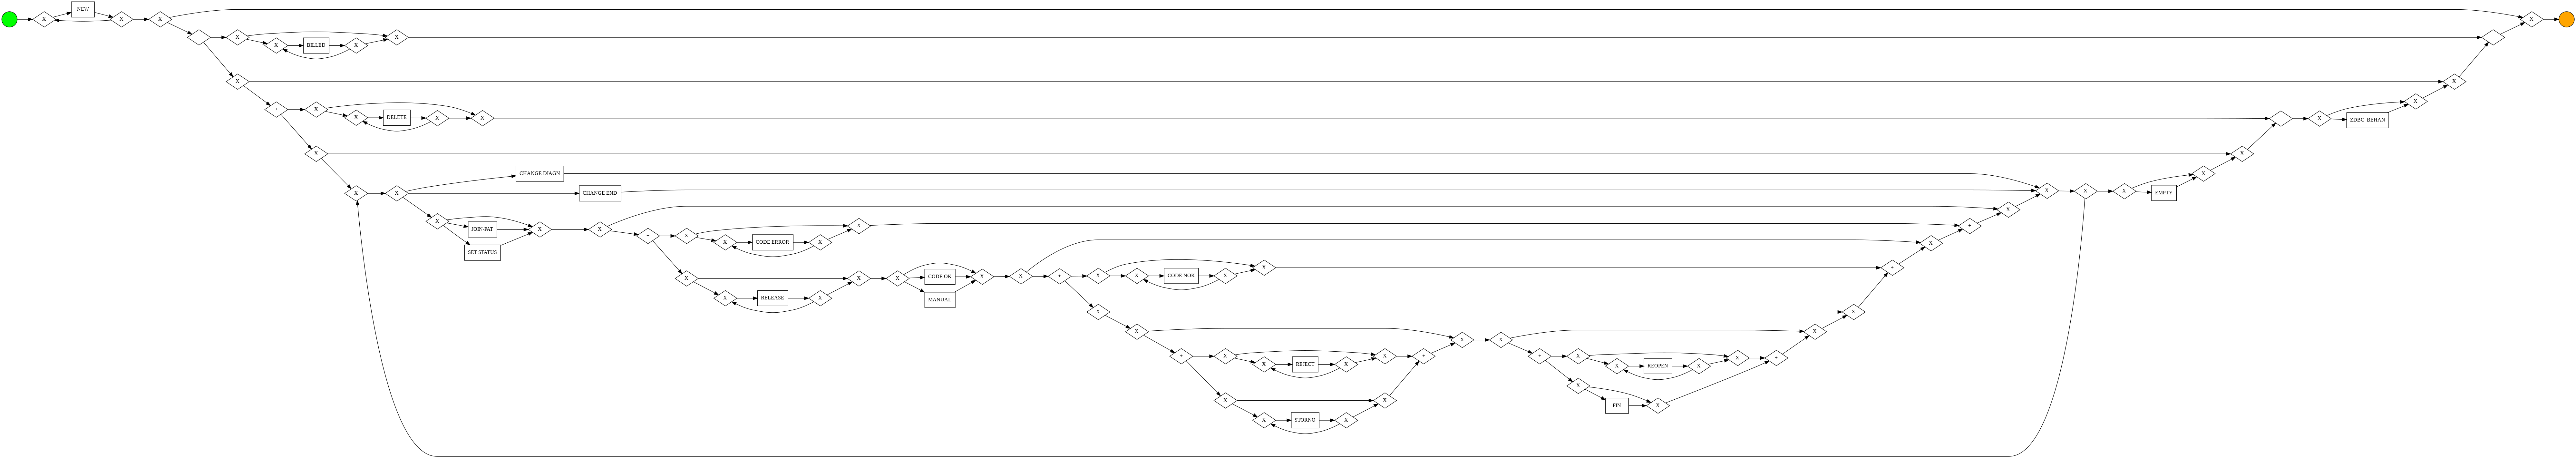

In [5]:
process_tree = pm4py.discover_process_tree_inductive(event_log)
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)

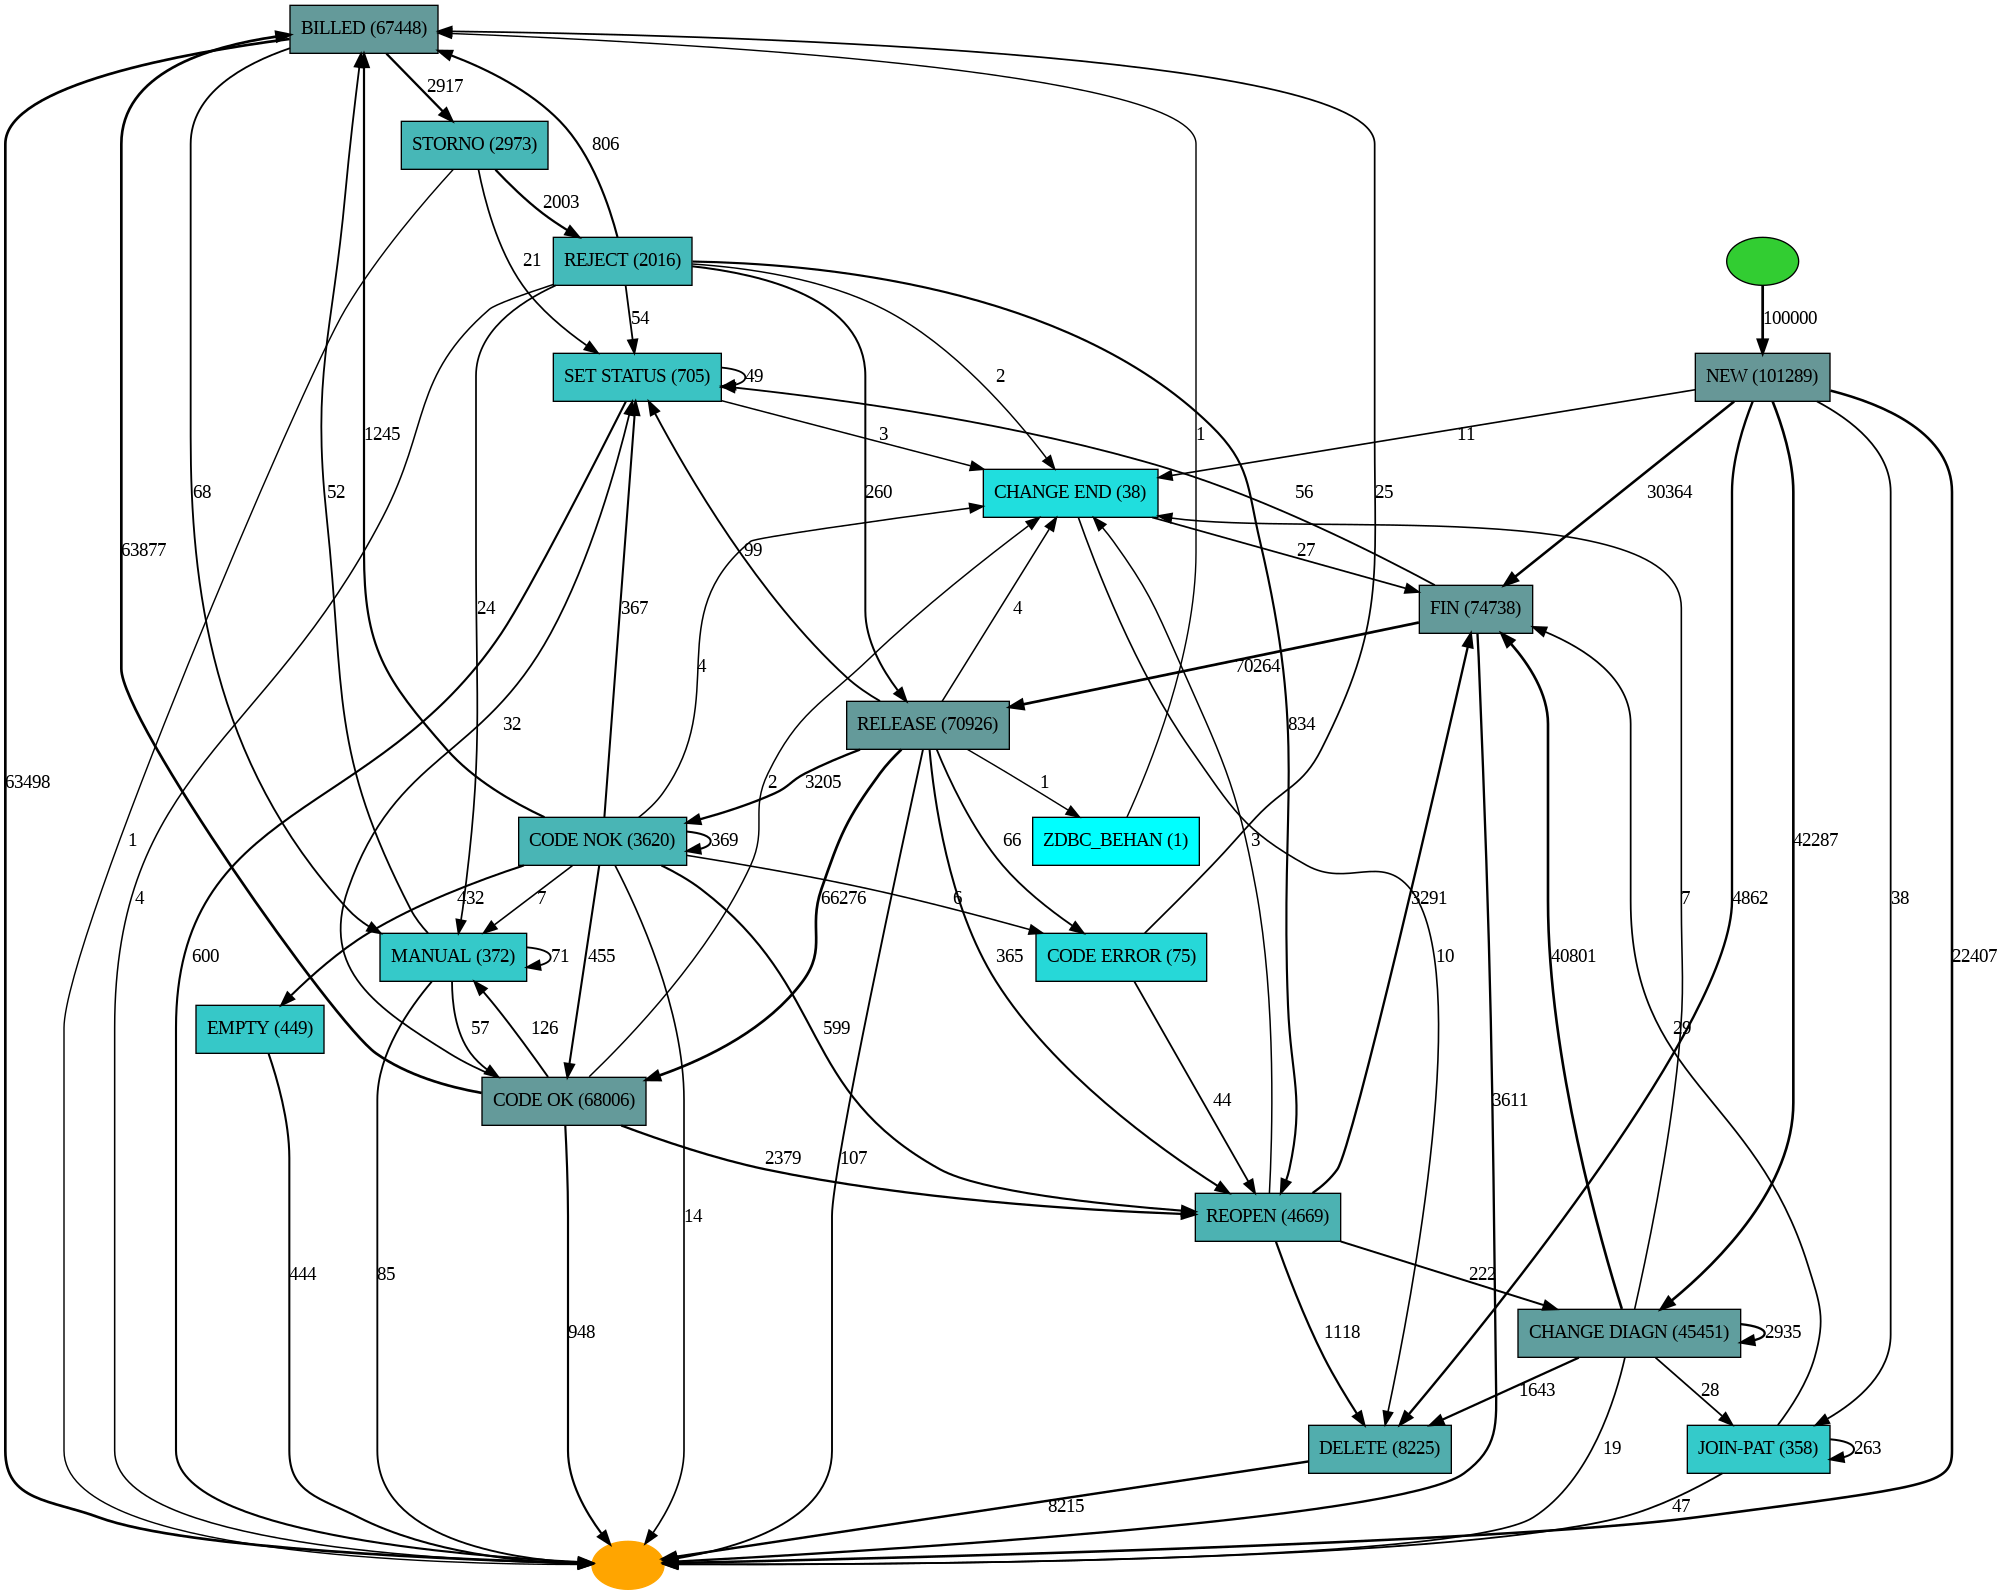

In [6]:
map = pm4py.discover_heuristics_net(event_log)
pm4py.view_heuristics_net(map)

In [7]:
from google.colab import output
output.enable_custom_widget_manager()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [8]:
from google.colab import output
output.disable_custom_widget_manager()